<a href="https://colab.research.google.com/github/praveenbejo95/Bike-sharing-demand-prediction-ML-regression-project-/blob/main/Bike_Sharing_Demand_Prediction(Pravin_notebook)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/2nd ML(regression) project/SeoulBikeData.csv'

In [ ]:
# Loading the csv File

bike_df = pd.read_csv(path,  encoding= 'unicode_escape')
bike_df.head() # head of the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_df.shape #Looking at the shape of the dataset

(8760, 14)

In [ ]:
bike_df.info()  #checks the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#**Performing EDA**

In [ ]:
#Let's count how many NaN or Null values we have

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

###**Above result says that there are no null values in the data**

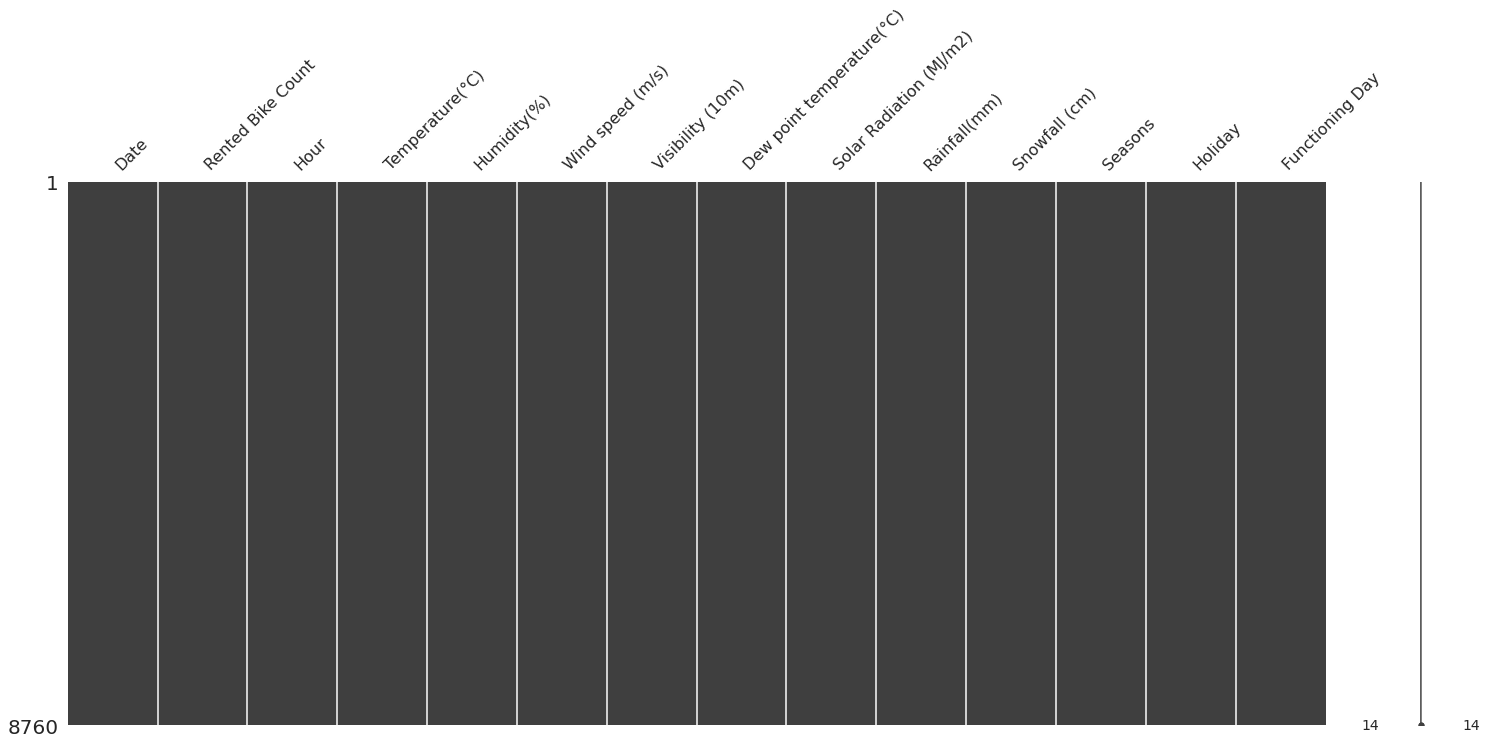

In [ ]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.matrix(bike_df)

In [ ]:
bike_df.describe() #Statistical aspect of the dataframe

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# finding the type of data of 'Date' column

bike_df['Date'].dtype

dtype('O')

In [ ]:
# converting string format of 'Date' column into date-time format

bike_df['Date'] = pd.to_datetime(bike_df['Date'],format='%d/%m/%Y')
bike_df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
bike_df['year'] = pd.DatetimeIndex(bike_df['Date']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['Date']).month
bike_df['Dayofweek'] = bike_df['Date'].dt.weekday

In [ ]:
# replace month number into words for better understanding

bike_df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],inplace=True)

In [ ]:
# replace dayofweek number into words for better understanding

bike_df['Dayofweek'].replace([0,1,2,3,4,5,6],['Mon','Tues','Wed','Thur','Fri','Sat','Sun'],inplace=True)

In [ ]:
# let's see the head of the data now

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,Dayofweek
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri


In [ ]:
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
# creating a dataframe containing the sum of all column values pertaining to differant seasons

df = bike_df.groupby('Seasons').sum()

In [ ]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
Seasons,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,21840
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,8832
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15480
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,11016


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c365d97d0>],
      dtype=object)

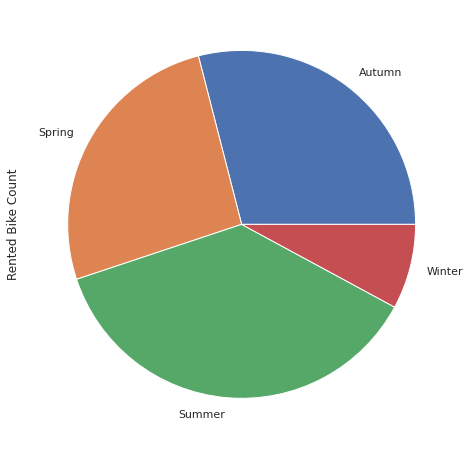

In [ ]:
# creating a pie chart of bike count in differant seasons

df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8))

**conclusions from above pie chart:**

**1.most bikes have been rented in the summer season.**

**2.least bike rent count is in winter season.**

**3.autumn and spring seasons have almost equal amounts of bike rent count.**

In [ ]:
# creating a dataframe which contains rented bike counts in each seasaon

df_seasons = df.groupby('Seasons').sum()['Rented Bike Count']

In [ ]:
df_seasons

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

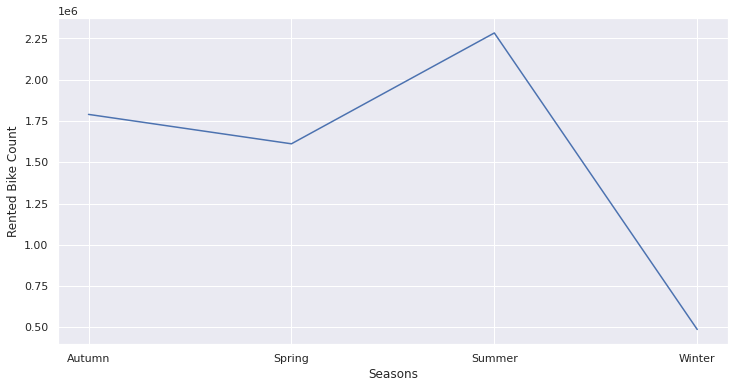

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_seasons)
plt.show()

In [ ]:
bike_df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

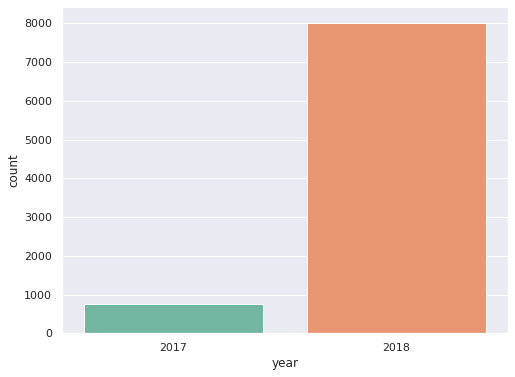

In [ ]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'year', data = bike_df,palette='Set2')

**Above plot shows that most of the bikes have been rented in the year 2018.**

In [ ]:
# creating a series which shows total number of bikes rented on the type of day

df_hol = bike_df.groupby('Holiday').sum()['Rented Bike Count']

In [ ]:
df_hol

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

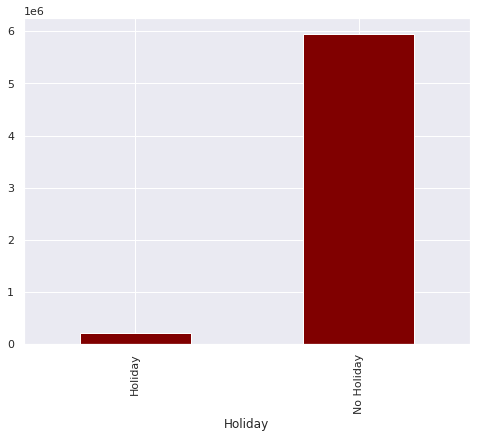

In [ ]:
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
df_hol.plot(kind='bar',color = 'maroon')

**Above plot shows that most of the bikes have been rented on working days.**

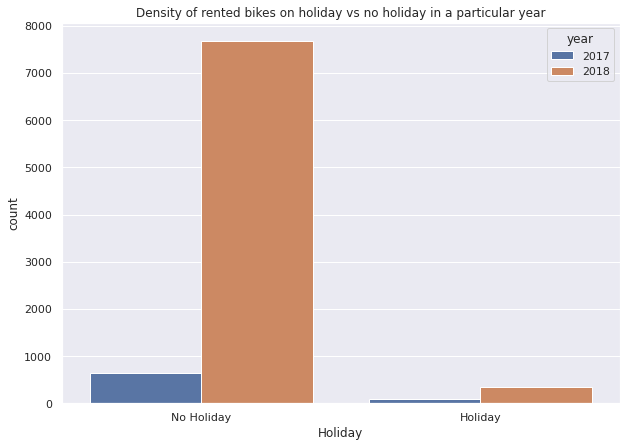

In [ ]:
# bikes rented on type of day in each year

plt.figure(figsize=(10,7))
sns.countplot(x='Holiday', hue = 'year', data= bike_df)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()

In [ ]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(bike_df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())

In [ ]:
# resetting index of the dataframe

df_rain.reset_index(inplace=True)

In [ ]:
df_rain.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


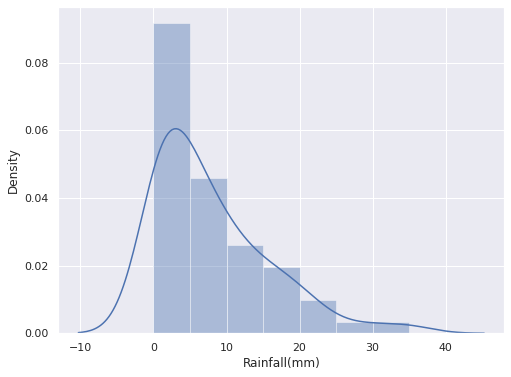

In [ ]:
# plot showing distribution of bike rentals according to rainfall intensity

plt.figure(figsize=(8,6))
sns.distplot(df_rain['Rainfall(mm)'])

**Above plot shows that people tend to rent bikes when there is no or less rainfall.**

In [ ]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(bike_df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())

In [ ]:
df_snow.reset_index(inplace=True)

In [ ]:
df_snow.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


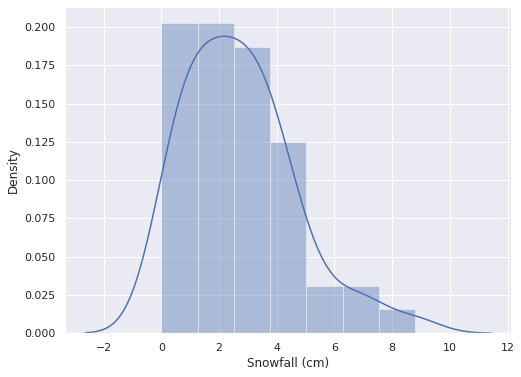

In [ ]:
# plot showing distribution of bike rentals according to snowfall intensity

plt.figure(figsize=(8,6))
sns.distplot(df_snow['Snowfall (cm)'])

**Above plot shows that people tend to rent bikes when there is no or less snowfall.**

In [ ]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_temp = pd.DataFrame(bike_df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

In [ ]:
df_temp.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


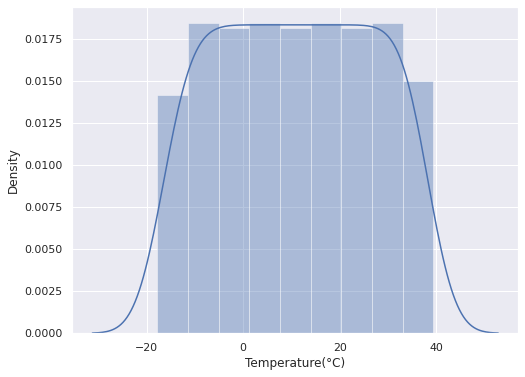

In [ ]:
# plot showing distribution of bike rentals according to temperature intensity

plt.figure(figsize=(8,6))
sns.distplot(df_temp['Temperature(°C)'])

**Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.**

In [ ]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(bike_df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

In [ ]:
df_visi.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


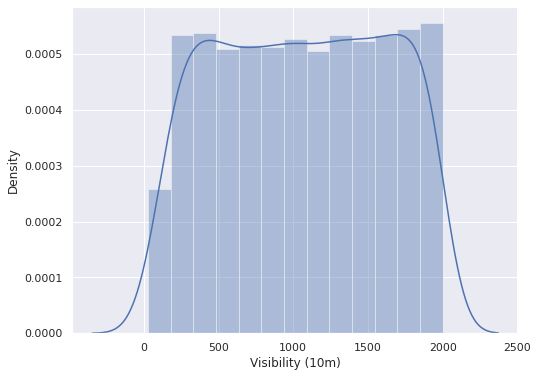

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_visi['Visibility (10m)'])

**Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.**